# 미니 프로젝트
- 과제 : 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기. 
- 조건 : 데이터 2개 이상을 연결해본 결과값 포함

## 목차
[1. 데이터 불러오기](#1.-데이터-불러오기)  
[2. 시각화](#2.-시각화)

# 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [3]:
#답변대상 청원 뽑기
df['answer'] = (df['votes'] > 200000) == 1
df['answer'] = df['answer'].astype('int')

In [4]:
df.shape

(395547, 9)

In [5]:
df.head()

,article_id,start,end,answered,votes,category,title,content,answer
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,0
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,0
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",0
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,0
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",0


In [6]:
#결측치 확인
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
answer        0
dtype: int64

In [7]:
#데이터 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
 8   answer      395547 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(3), object(3)
memory usage: 25.7+ MB


In [8]:
#수치형 데이터 요약
df.describe()

,article_id,answered,votes,answer
count,395547.000000,395547.000000,3.955470e+05,395547.000000
mean,251608.934635,0.000073,1.501188e+02,0.000202
std,153219.216242,0.008562,4.802583e+03,0.014220
min,21.000000,0.000000,0.000000e+00,0.000000
25%,115236.500000,0.000000,2.000000e+00,0.000000
50%,253682.000000,0.000000,5.000000e+00,0.000000
75%,386137.500000,0.000000,1.500000e+01,0.000000
max,517122.000000,1.000000,1.192049e+06,1.000000


In [9]:
#카테고리 데이터 요약
df.describe(include = np.object)

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


# 2.  EDA

In [10]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib notebook
import matplotlib.pyplot as plt

import seaborn as sns

### 2.1 카테고리 - 투표 수 - 청원 시기
어떤 시기, 어떤 카테고리의 글이 투표를 많이 받았는지에 대해 분석

**카테고리별 투표 수 시각화**

In [34]:
#카테고리 별 투표 수
cat_votes = df.groupby('category',as_index=False).votes.sum()
cat_votes

,category,votes
0,경제민주화,1739580
1,교통/건축/국토,2902330
2,기타,5190468
3,농산어촌,118871
4,문화/예술/체육/언론,4149796
5,미래,1140693
6,반려동물,2066624
7,보건복지,4341211
8,성장동력,871837
9,안전/환경,6605175


<IPython.core.display.Javascript object>


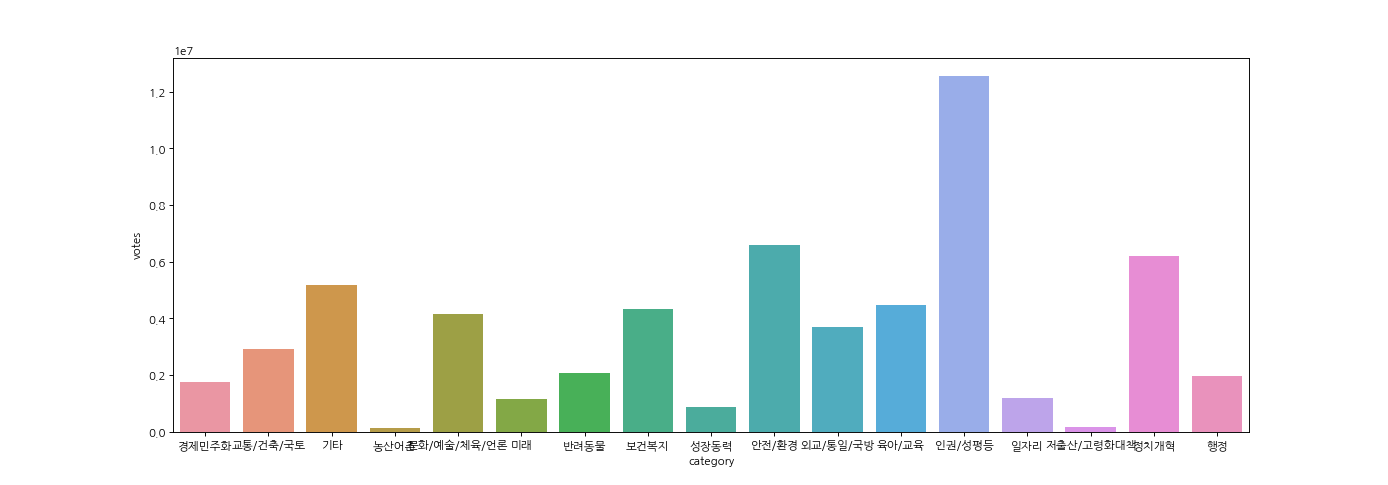

In [39]:
plt.figure(figsize=(20,7))
plt.rcParams['font.family'] = 'NanumGothic'
ax = sns.barplot(x = 'category', y = 'votes', data = cat_votes)

인권/성평등 항목의 투표 수가 가장 높은 것을 알 수 있다.  
이는 총 투표수이므로 카테고리에서 한 청원에 대한 평균 투표 수를 알아보기 위해 새로운 그래프를 그려보자

**카테고리 별 평균 투표 수**

In [40]:
#카테고리 별 평균투표 수
cat_votes_m = df.groupby('category',as_index=False).votes.mean()
cat_votes_m

,category,votes
0,경제민주화,103.589591
1,교통/건축/국토,102.977931
2,기타,106.619859
3,농산어촌,62.497897
4,문화/예술/체육/언론,227.923106
5,미래,63.371833
6,반려동물,509.397091
7,보건복지,174.710681
8,성장동력,120.203640
9,안전/환경,215.587669


<IPython.core.display.Javascript object>


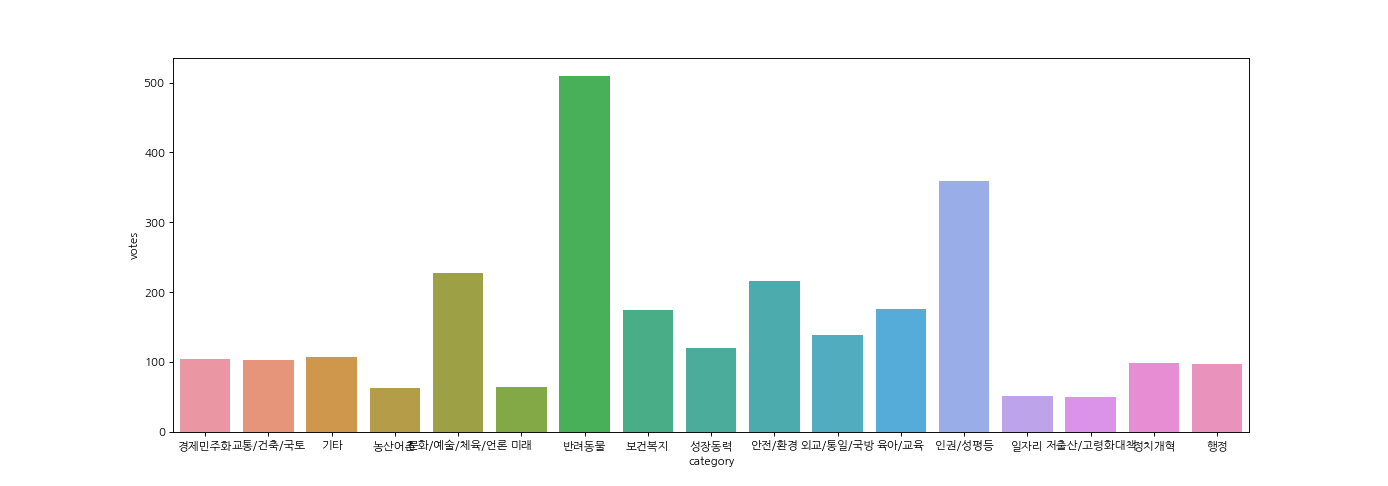

In [69]:
plt.figure(figsize=(20,7))
plt.rcParams['font.family'] = 'NanumGothic'
ax = sns.barplot(x = 'category', y = 'votes', data = cat_votes_m)

각 청원에 대한 평균 투표 수는 반려동물이 가장 많았고, 그 다음이 인권/성평등임을 볼 수 있다.  
이제 청원 시기와 카테고리별 투표 수를 합쳐, 어느 시기에 어떤 카테고리의 청원이 많은 투표를 받았는지 알아보자

In [45]:
# 청원 시작 날짜를 기준으로 년,월만 뽑아 새로운 열 생성
import datetime as dt

df['year'] = df['start'].dt.strftime('%Y')
df['month'] = df['start'].dt.strftime('%m')

In [67]:
#카테고리 별 투표 수 + 시기
ym_cat_votes = df.groupby(['category', 'month',  'year'],as_index=False).votes.sum()
ym_cat_votes

,category,month,year,votes
0,경제민주화,01,2018,64984
1,경제민주화,01,2019,19892
2,경제민주화,02,2018,257136
3,경제민주화,02,2019,3891
4,경제민주화,03,2018,82824
...,...,...,...,...
318,행정,10,2018,60765
319,행정,11,2017,69992
320,행정,11,2018,27508
321,행정,12,2017,23177


<IPython.core.display.Javascript object>


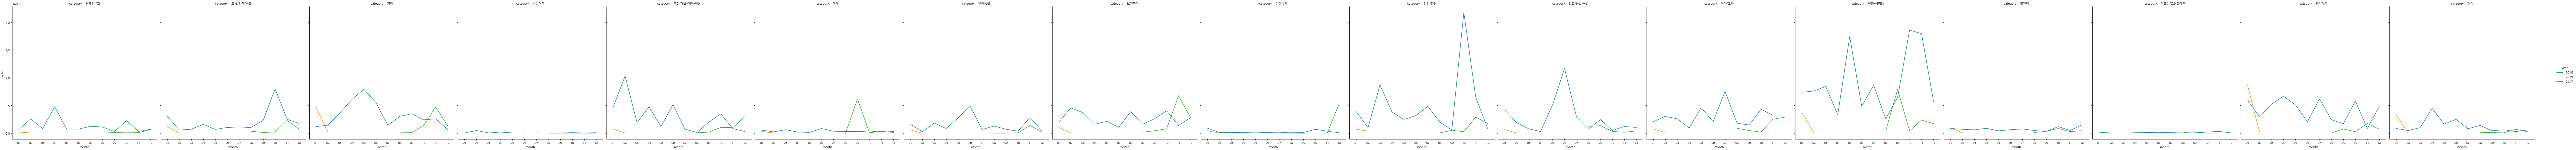

In [68]:
facet = sns.FacetGrid(ym_cat_votes, col = 'category', hue = 'year', height = 8)
facet.map(sns.lineplot, 'month', 'votes')
facet = facet.add_legend()

In [68]:
# 청원 시작 날짜 기준으로 년, 월 뽑아내기
import datetime as dt

year = df.loc[:, 'start'].dt.year
month = "{:%m}".format(df.loc[:, 'start'].dt.month)

df['year'] = year
df['month'] = month
df['y_m'] = df[['year', 'month']].astype(str).agg('-'.join, axis = 1)

TypeError: unsupported format string passed to Series.__format__

In [60]:
df['month']

0         8
1         8
2         8
3         8
4         8
         ..
395542    2
395543    2
395544    2
395545    2
395546    2
Name: month, Length: 395547, dtype: int64

In [34]:
# 연도 기준 카테고리별 투표 수
year_vote = df.groupby(['year', 'category']).votes.sum().unstack(level = 1).fillna(0)
year_vote

category,경제민주화,교통/건축/국토,기타,농산어촌,문화/예술/체육/언론,미래,반려동물,보건복지,성장동력,안전/환경,외교/통일/국방,육아/교육,인권/성평등,일자리,저출산/고령화대책,정치개혁,행정
year,,,,,,,,,,,,,,,,,
2017,92061,369522,757216,3163,528647,669617,163840,1091737,536392,546309,348618,696330,1277267,200474,41392,353333,124435
2018,1623736,2411210,3941590,110763,3545299,437753,1844026,3140775,291573,5952006,3280950,3687326,10898743,880009,131656,4972611,1503182
2019,23783,121598,491662,4945,75850,33323,58758,108699,43872,106860,66544,91641,383338,100295,5407,879069,329843


2018년 투표수가 가장 많은 것으로 보이나, 데이터가 2017년 7월부터 2019년 2월까지이므로 연도 기준으로 총 투표수를 보는 것은 의미 없음. 

따라서 월 단위로 잘라서 보거나 연도 기간만큼 평균을 내거나 해야할 것으로 보임.

In [58]:
# 연월 기준 카테고리 별 투표 수
df.groupby(['y_m', 'category']).votes.sum().unstack(level = 1).fillna(0)

category,경제민주화,교통/건축/국토,기타,농산어촌,문화/예술/체육/언론,미래,반려동물,보건복지,성장동력,안전/환경,외교/통일/국방,육아/교육,인권/성평등,일자리,저출산/고령화대책,정치개혁,행정
y_m,,,,,,,,,,,,,,,,,
2017-10,6323,19234,137225,984,105445,7097,5954,79430,4035,26221,31484,19547,42399,83578,430,25970,5782
2017-11,9326,228410,472953,574,99065,32939,139389,676108,527,290672,16432,251292,237945,27987,2303,176368,69992
2017-12,63178,75285,131480,733,298713,12639,18282,275687,531656,173432,40285,289303,169838,45380,6541,72333,23177
2017-8,2640,33883,5970,93,7115,41,38,17241,3,4209,125473,88421,36576,10786,6040,4112,15403
2017-9,10594,12710,9588,779,18309,616901,177,43271,171,51775,134944,47767,790509,32743,26078,74550,10081
2018-1,64984,304259,118411,2521,465812,54547,163465,200515,89636,394976,420624,206069,737623,85660,15906,596200,84769
2018-10,226551,798484,241442,8720,348049,38561,36104,404137,69639,2177189,49589,430319,1860744,118347,18822,578486,60765
2018-11,31656,251177,257832,3678,82050,19530,282180,138338,36291,644902,120490,324993,1794247,48584,32773,84926,27508
2018-12,68320,173487,66775,7707,29825,29388,41997,281275,7327,79969,103518,324721,573657,152290,4567,480114,58928


In [48]:
ax = sns.swarmplot(x = 'year' , y = 'votes', hue = 'category', data = df)

KeyboardInterrupt: 

In [16]:
#연도 기준으로 카테고리별 투표율


array([    21,     22,     23, ..., 517120, 517121, 517122], dtype=int64)